# Lab Assignment 2

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_classification

%matplotlib notebook

In [2]:
X, y = make_classification(n_samples=500, n_features=3, n_informative=3,
                           n_redundant=0, n_clusters_per_class=1,
                           flip_y=0.1,  # adds a small amount of noise
                           class_sep=1.0,  # classes are separable but not too easily
                           random_state=40)

In [3]:
print(f"The dimension of X and y: {X.shape}, {y.shape}")
#so consequently the dimension of w and b:
print(f"The dimensions of w and b is: {X.shape}, ({X.shape[0]},)")

The dimension of X and y: (500, 3), (500,)
The dimensions of w and b is: (500, 3), (500,)


1. Relabel the Y targets to +1/-1

In [4]:
y = np.where(y == 0, -1, 1)
y

array([ 1, -1,  1,  1, -1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1, -1,  1,
        1,  1, -1,  1, -1,  1, -1, -1,  1,  1,  1,  1, -1, -1,  1,  1, -1,
       -1, -1,  1, -1, -1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1, -1, -1, -1,  1, -1,  1,  1, -1, -1,  1, -1,  1, -1,  1,  1,
        1, -1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1, -1,  1, -1,  1,
       -1, -1, -1,  1,  1, -1,  1,  1,  1, -1, -1, -1, -1,  1,  1, -1, -1,
        1, -1, -1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1, -1,  1, -1,  1,
        1, -1,  1, -1, -1, -1, -1,  1, -1,  1, -1,  1,  1,  1,  1, -1,  1,
        1, -1,  1, -1, -1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1,
        1,  1,  1, -1,  1, -1, -1, -1, -1,  1,  1,  1,  1, -1,  1,  1, -1,
        1,  1, -1,  1,  1, -1,  1, -1, -1, -1, -1,  1,  1,  1, -1,  1, -1,
       -1, -1,  1,  1, -1, -1,  1,  1, -1,  1,  1, -1, -1, -1, -1, -1, -1,
       -1,  1,  1, -1, -1, -1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1,
        1, -1,  1, -1,  1

 2. Split the dataset into training and testing datasets

In [5]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42, shuffle=True)

3. Implement soft margin SVM
4. Use mini batch gradient descent to minimize the loss function on the next page (shuffle the data first).
5. Return the optimal weights by minimizing the loss function
6. Perform some predictions on the test data

In [6]:
losses = [] 
c = 1.0

# Cost function  = maximizing width term + regularization term 
# The regularization term includes: c* 1/n *sum of( max(0,1-y(wx+b)) )
# Hinge loss: 1- y(w.dot(x)+b)

def hingeloss(w,b,x,y):
    return max(0, 1-(y*(w.dot(x)+b)))

# cost function --> c(w) = 1/n * sum of(1/2*abs(w)^2 + c*(hingeloss))
def cost_fn_grad(w,b,x,y):    
    loss = hingeloss(w,b,x,y)    
    if loss == 0: 
        gradw = w
        gradb = 0.0
    else: 
        gradw = w - c*y*x
        gradb = -c*y
    
    return gradw, gradb


def svm_fit(X, Y, batch_size=50, learning_rate=0.001, epochs=1000):
    n_samples, n_features = X.shape
    w = np.zeros((1,n_features))
    b = 0.0
    
    # To shuffle the x_train and y in the same order, just using shuffled indices to do that
    idex = np.arange(n_samples) 
    np.random.shuffle(idex) 

    for i in range(epochs): 
        loss = 0.0
        print(f"SVM training----------->Epoch {i}")     
        for j in range(0, n_samples, batch_size):
            gradw = 0.0
            gradb = 0.0 
            
            for k in range(j, j+batch_size): # training in batches
                if k < n_samples:
                    ctr = idex[k]
                    wi , bi = cost_fn_grad(w,b,X[ctr],Y[ctr])
                    gradw += wi
                    gradb += bi
                    
            # Updating weights and bias
            w = w - learning_rate * gradw
            b = b - learning_rate * gradb
        
        for i in range(n_samples): 
            loss += hingeloss(w, b, X[i], Y[i])
       
      
        hinge_loss = 0.5 * np.linalg.norm(w)**2 + c * (loss/n_samples)
        losses.append(hinge_loss) 
        
    return w, b

def predict(x, w, b):
    prediction = x.dot(w[0]) + b # w.x + b
    return np.sign(prediction)

w, b = svm_fit(x_train, y_train)

SVM training----------->Epoch 0
SVM training----------->Epoch 1
SVM training----------->Epoch 2
SVM training----------->Epoch 3
SVM training----------->Epoch 4
SVM training----------->Epoch 5
SVM training----------->Epoch 6
SVM training----------->Epoch 7
SVM training----------->Epoch 8
SVM training----------->Epoch 9
SVM training----------->Epoch 10
SVM training----------->Epoch 11
SVM training----------->Epoch 12
SVM training----------->Epoch 13
SVM training----------->Epoch 14
SVM training----------->Epoch 15
SVM training----------->Epoch 16
SVM training----------->Epoch 17
SVM training----------->Epoch 18
SVM training----------->Epoch 19
SVM training----------->Epoch 20
SVM training----------->Epoch 21
SVM training----------->Epoch 22
SVM training----------->Epoch 23
SVM training----------->Epoch 24
SVM training----------->Epoch 25
SVM training----------->Epoch 26
SVM training----------->Epoch 27
SVM training----------->Epoch 28
SVM training----------->Epoch 29
SVM training--------

SVM training----------->Epoch 279
SVM training----------->Epoch 280
SVM training----------->Epoch 281
SVM training----------->Epoch 282
SVM training----------->Epoch 283
SVM training----------->Epoch 284
SVM training----------->Epoch 285
SVM training----------->Epoch 286
SVM training----------->Epoch 287
SVM training----------->Epoch 288
SVM training----------->Epoch 289
SVM training----------->Epoch 290
SVM training----------->Epoch 291
SVM training----------->Epoch 292
SVM training----------->Epoch 293
SVM training----------->Epoch 294
SVM training----------->Epoch 295
SVM training----------->Epoch 296
SVM training----------->Epoch 297
SVM training----------->Epoch 298
SVM training----------->Epoch 299
SVM training----------->Epoch 300
SVM training----------->Epoch 301
SVM training----------->Epoch 302
SVM training----------->Epoch 303
SVM training----------->Epoch 304
SVM training----------->Epoch 305
SVM training----------->Epoch 306
SVM training----------->Epoch 307
SVM training--

SVM training----------->Epoch 549
SVM training----------->Epoch 550
SVM training----------->Epoch 551
SVM training----------->Epoch 552
SVM training----------->Epoch 553
SVM training----------->Epoch 554
SVM training----------->Epoch 555
SVM training----------->Epoch 556
SVM training----------->Epoch 557
SVM training----------->Epoch 558
SVM training----------->Epoch 559
SVM training----------->Epoch 560
SVM training----------->Epoch 561
SVM training----------->Epoch 562
SVM training----------->Epoch 563
SVM training----------->Epoch 564
SVM training----------->Epoch 565
SVM training----------->Epoch 566
SVM training----------->Epoch 567
SVM training----------->Epoch 568
SVM training----------->Epoch 569
SVM training----------->Epoch 570
SVM training----------->Epoch 571
SVM training----------->Epoch 572
SVM training----------->Epoch 573
SVM training----------->Epoch 574
SVM training----------->Epoch 575
SVM training----------->Epoch 576
SVM training----------->Epoch 577
SVM training--

SVM training----------->Epoch 797
SVM training----------->Epoch 798
SVM training----------->Epoch 799
SVM training----------->Epoch 800
SVM training----------->Epoch 801
SVM training----------->Epoch 802
SVM training----------->Epoch 803
SVM training----------->Epoch 804
SVM training----------->Epoch 805
SVM training----------->Epoch 806
SVM training----------->Epoch 807
SVM training----------->Epoch 808
SVM training----------->Epoch 809
SVM training----------->Epoch 810
SVM training----------->Epoch 811
SVM training----------->Epoch 812
SVM training----------->Epoch 813
SVM training----------->Epoch 814
SVM training----------->Epoch 815
SVM training----------->Epoch 816
SVM training----------->Epoch 817
SVM training----------->Epoch 818
SVM training----------->Epoch 819
SVM training----------->Epoch 820
SVM training----------->Epoch 821
SVM training----------->Epoch 822
SVM training----------->Epoch 823
SVM training----------->Epoch 824
SVM training----------->Epoch 825
SVM training--

7. Calculate the accuracy score

In [7]:
y_train_pred = predict(x_train, w, b) #the decision boundary for the training dataset 
y_test_pred = predict(x_test, w, b)

print(f"The accuracy score of the prediction on the train split: {accuracy_score(y_train, y_train_pred, normalize = True)}")
print(f"The accuracy score of the prediction on the test split: {accuracy_score(y_test, y_test_pred, normalize = True)}")

The accuracy score of the prediction on the train split: 0.865
The accuracy score of the prediction on the test split: 0.82


8. Visualize the training data and decision boundary in 3D

<IPython.core.display.Javascript object>


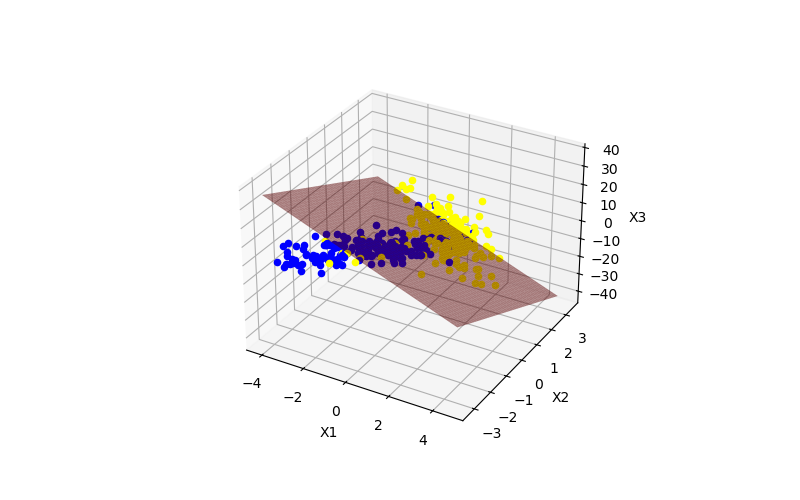

In [8]:
# plotting the 3d graph
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111, projection='3d')

# Plot data points based on the y value 
for i in range(x_train.shape[0]):
    if y_train[i] == 1:
        ax.scatter(x_train[i, 0], x_train[i, 1], x_train[i, 2], c='blue', marker='o')
    else:
        ax.scatter(x_train[i, 0], x_train[i, 1], x_train[i, 2], c='yellow', marker='o')

# meshgrid
xx, yy = np.meshgrid(np.linspace(x_train[:, 0].min(), x_train[:, 0].max(), 50), np.linspace(x_train[:, 1].min(), x_train[:, 1].max(), 50))

z = (-w[0][0] * xx - w[0][1] * yy - b) / w[0][2] # Calculate decision boundary
ax.plot_surface(xx, yy, z, alpha=0.5, color='red') # Plot decision boundary

# Set labels
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
plt.show()

9. Visualize the loss function over time during training

<IPython.core.display.Javascript object>


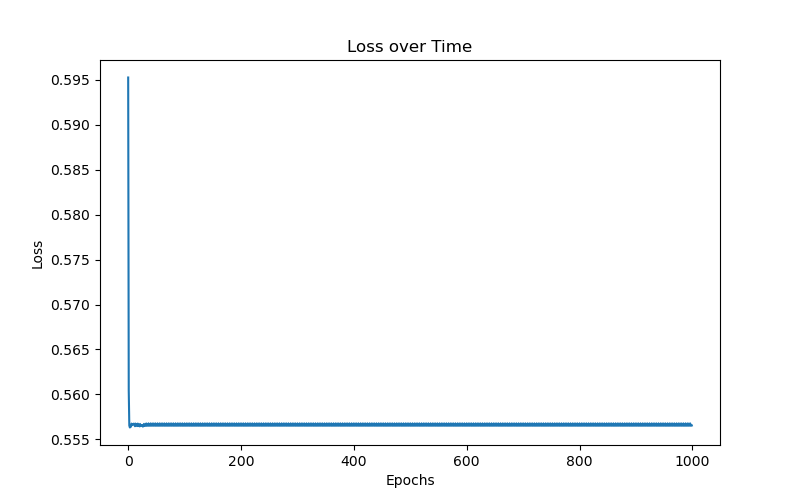

In [9]:
# Plot the loss over time
epochs = np.arange(1000) # creating an array of 

fig = plt.figure(figsize=(8, 5))
plt.plot(epochs,losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Time')
plt.show()